# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
cities_df = pd.DataFrame({"city_name": [],
                        "latitude": [],
                        "longitude": [],
                        "max temp": [],
                        "humidity": [],
                        "cloudiness": [],
                        "wind speed": [],
                        "country": [],
                        "date": []})

for index, city in enumerate(cities):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    weather_url = f'{base_url}q={city}&units=imperial&appid={weather_api_key}'
    response = requests.get(weather_url).json()

    try:
        print(f"Processing Record {index} | {city}.")
        cities_df.loc[index, 'city_name'] = response['name']
        cities_df.loc[index, 'latitude'] = response['coord']['lat']
        cities_df.loc[index, 'longitude'] = response['coord']['lon']
        cities_df.loc[index, 'max temp'] = response['main']['temp_max']
        cities_df.loc[index, 'humidity'] = response['main']['humidity']
        cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'wind speed'] = response['wind']['speed']
        cities_df.loc[index, 'country'] = response['sys']['country']
        cities_df.loc[index, 'date'] = response['dt']

    except (KeyError, NameError):
        print("City not found. Skipping...")

Processing Record 0 | baracoa.
Processing Record 1 | yellowknife.
Processing Record 2 | hobart.
Processing Record 3 | hermanus.
Processing Record 4 | rocha.
Processing Record 5 | cidreira.
Processing Record 6 | hilo.
Processing Record 7 | kavieng.
Processing Record 8 | kapaa.
Processing Record 9 | mataura.
Processing Record 10 | jamestown.
Processing Record 11 | beinamar.
Processing Record 12 | sambava.
Processing Record 13 | khonuu.
City not found. Skipping...
Processing Record 14 | wanaka.
Processing Record 15 | talara.
Processing Record 16 | manyana.
Processing Record 17 | busselton.
Processing Record 18 | utiroa.
City not found. Skipping...
Processing Record 19 | rikitea.
Processing Record 20 | derzhavinsk.
Processing Record 21 | bengkulu.
Processing Record 22 | broken hill.
Processing Record 23 | nicoya.
Processing Record 24 | batagay-alyta.
Processing Record 25 | hualmay.
Processing Record 26 | vaini.
Processing Record 27 | attawapiskat.
City not found. Skipping...
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_df.head()

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Baracoa,20.3467,-74.4958,78.66,76.0,17.0,11.01,CU,1.617054e+09
1,Yellowknife,62.4560,-114.3525,6.01,47.0,20.0,13.80,CA,1.617053e+09
2,Hobart,-42.8794,147.3294,52.00,87.0,0.0,4.61,AU,1.617054e+09
3,Hermanus,-34.4187,19.2345,66.00,61.0,32.0,3.29,ZA,1.617054e+09
4,Rocha,-34.4833,-54.3333,65.62,90.0,70.0,12.46,UY,1.617054e+09


In [9]:
cities_df.to_csv("city_weather.csv")
cities_df

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date
0,Baracoa,20.3467,-74.4958,78.66,76.0,17.0,11.01,CU,1.617054e+09
1,Yellowknife,62.4560,-114.3525,6.01,47.0,20.0,13.80,CA,1.617053e+09
2,Hobart,-42.8794,147.3294,52.00,87.0,0.0,4.61,AU,1.617054e+09
3,Hermanus,-34.4187,19.2345,66.00,61.0,32.0,3.29,ZA,1.617054e+09
4,Rocha,-34.4833,-54.3333,65.62,90.0,70.0,12.46,UY,1.617054e+09
...,...,...,...,...,...,...,...,...,...
618,Ondjiva,-17.0667,15.7333,66.97,75.0,45.0,5.12,AO,1.617054e+09
619,Tocopilla,-22.0920,-70.1979,70.39,71.0,70.0,9.93,CL,1.617054e+09
620,Byron Bay,-28.6500,153.6167,66.20,94.0,75.0,5.75,AU,1.617053e+09
621,Inhambane,-23.8650,35.3833,69.19,69.0,0.0,5.46,MZ,1.617054e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
high_humidity = cities_df.loc[cities_df["humidity"] > 100.0]
high_humidity

,city_name,latitude,longitude,max temp,humidity,cloudiness,wind speed,country,date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The below scatter plot is looking the relationship between each city's latitude coordinate and each city's maximum temperatures. Looking at the data, you can see the higher the latitude, the colder the temperature is Fahrenheit (F).

''

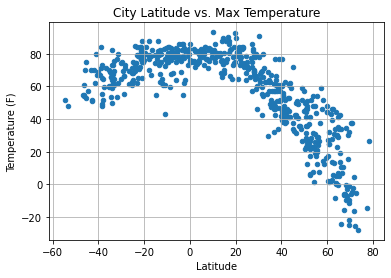

In [34]:
cities_df.plot.scatter('latitude', 'max temp')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_temp.png")
;

## Latitude vs. Humidity Plot

The scatter plot below is looking at the relationship between each city's latitude and the humidity in each city. Looking the data, the data points are all over the plot, so it difficult to see a relationship between the two variables. 

''

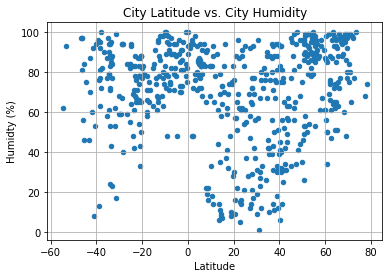

In [36]:
cities_df.plot.scatter('latitude', 'humidity')
plt.title("City Latitude vs. City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_humidity.png")
;

## Latitude vs. Cloudiness Plot

The scatter plot below is looking at the relationship between each city's latitude coordinate and the cloudiness in each city. Looking the data, the data points are all over the plot, so it difficult to see a relationship between the two variables. 

''

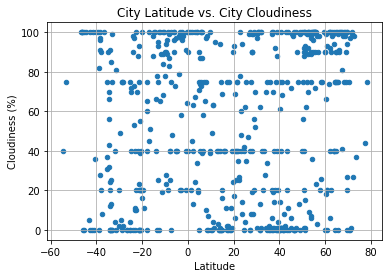

In [37]:
cities_df.plot.scatter('latitude', 'cloudiness')
plt.title("City Latitude vs. City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_cloudiness.png")
;

## Latitude vs. Wind Speed Plot

The scatter plot below is looking at the relationship between each city's latitude and the wind speed in each city. Looking the data, you can a majority of data points have wind speeds less than 10 mph.

''

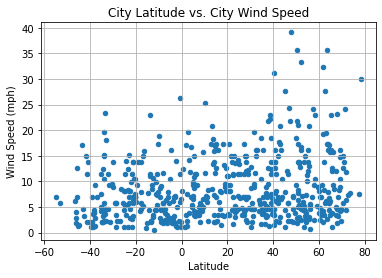

In [38]:
cities_df.plot.scatter('latitude', 'wind speed')
plt.title("City Latitude vs. City Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")
plt.savefig("../Images/latitude_vs_windspeed.png")
;

## Linear Regression

In [39]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
northern_hemisphere_df = cities_df.loc[cities_df['latitude'] >= 0.0]
southern_hemisphere_df = cities_df.loc[cities_df['latitude'] < 0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8770420991217953


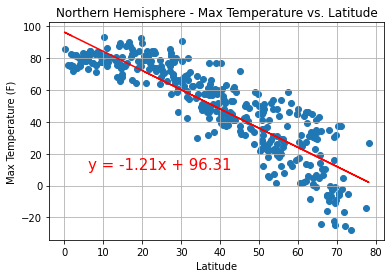

In [40]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['max temp']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5419123473318957


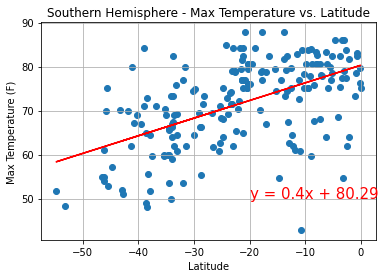

In [41]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['max temp']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_temp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2767799345089501


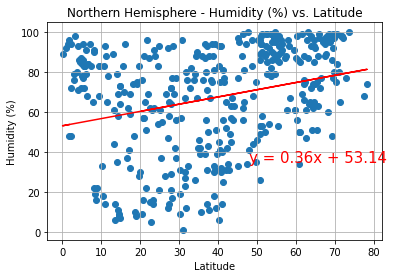

In [42]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['humidity']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(48,35),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_humidity_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.20700127937985108


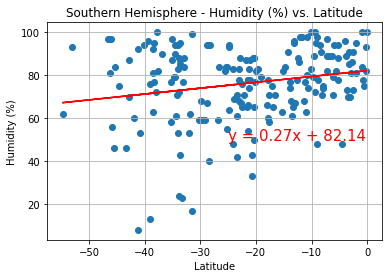

In [43]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['humidity']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_humidity_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2221500192945375


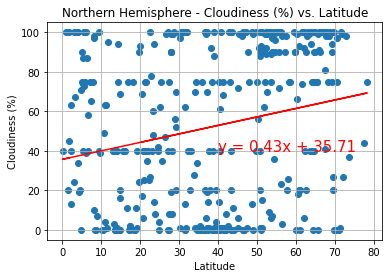

In [44]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['cloudiness']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/northernhem_cloudiness_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.21941706780915063


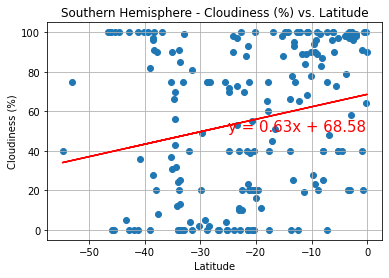

In [45]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['cloudiness']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

plt.savefig("../Images/southernhem_cloudiness_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.10198458536504101


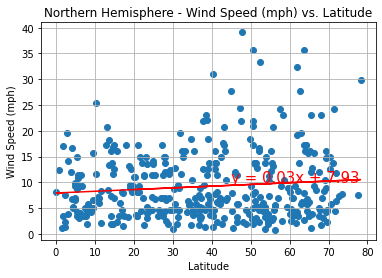

In [46]:
x_label = northern_hemisphere_df['latitude']
y_label = northern_hemisphere_df['wind speed']
plt.scatter(x_label, y_label)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")
plt.savefig("../Images/northernhem_windspeed_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0027035968390084074


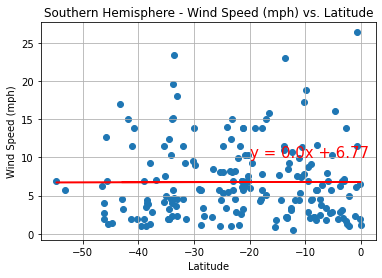

In [47]:
x_label = southern_hemisphere_df['latitude']
y_label = southern_hemisphere_df['wind speed']
plt.scatter(x_label, y_label)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(axis="both")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_label, y_label)
regress_values = x_label * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_label,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")
plt.savefig("../Images/southernhem_windspeed_vs_lat.png")

## Observable Trends

Three observable trends from looking at the data above include:
1. Latitude and temperature do appear to have a relationship. As you can see in the plot labeled "City Latitude vs. City Max Temperature", you can citys with a latitude closer to zero have a higher temperature, and as the latitude increases and goes further from zero, the temperature decreases. This makes sense since zero represents the equator, so the temperature would be higher.
2. Looking at the plot, "City Latitude vs. City Cloudiness", there seems to be no relationship between latitude and city cloudiness as the data points are all over the plot. 
3. When you look at the northern and southern hemisphere plots comparing wind spped (mph) to latitude, the northern hemisphere has a cluster of datapoints below 10 mph, where the southern hemisphere has more spread out data.